In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [3]:
#AG news classification dataset
#https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset?select=test.csv

df = pd.read_csv('train.csv')

In [4]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
#Combine the Title and Description columns to create a full text record.
df['text'] = df['Title'] + " " + df['Description']

In [6]:
max_words = 10000

In [7]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
#Tokenizing text
tokenizer = Tokenizer(num_words=max_words)

In [9]:
tokenizer.fit_on_texts(train_data['text'])

In [10]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'a': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'at': 14,
 'its': 15,
 'is': 16,
 'new': 17,
 'by': 18,
 'said': 19,
 'it': 20,
 'reuters': 21,
 'has': 22,
 'from': 23,
 'an': 24,
 'ap': 25,
 'his': 26,
 'will': 27,
 'after': 28,
 'was': 29,
 'us': 30,
 'gt': 31,
 'lt': 32,
 'be': 33,
 'over': 34,
 'have': 35,
 'up': 36,
 'their': 37,
 'two': 38,
 'first': 39,
 'are': 40,
 'quot': 41,
 'year': 42,
 'but': 43,
 'more': 44,
 'he': 45,
 'u': 46,
 '1': 47,
 'this': 48,
 'one': 49,
 'world': 50,
 'monday': 51,
 'wednesday': 52,
 'oil': 53,
 'out': 54,
 'tuesday': 55,
 'thursday': 56,
 'company': 57,
 '2': 58,
 'not': 59,
 'against': 60,
 'inc': 61,
 'friday': 62,
 'than': 63,
 'into': 64,
 'last': 65,
 'about': 66,
 'b': 67,
 'york': 68,
 'they': 69,
 'three': 70,
 'yesterday': 71,
 'iraq': 72,
 'no': 73,
 'who': 74,
 'president': 75,
 'were': 76,
 'million': 77,
 'microsoft': 78,
 'game': 79,
 'been

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['text']), maxlen=100)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['text']), maxlen=100)
y_train = train_data['Class Index']
y_test = test_data['Class Index']

In [22]:
# Label conversion
y_train = y_train - 1
y_test = y_test - 1


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Create model LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(4, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
#Create a callback to save the neural network at each epoch
#if the performance on the validation dataset has improved
model_save_path = 'best_model_h5.keras'
callback = ModelCheckpoint(filepath=model_save_path,
                          monitor = 'val_accuracy',
                          save_best_only=True,
                          verbose=1)

In [24]:
history = lstm_model.fit(X_train, y_train, epochs=5,
                         batch_size=128, validation_split=0.5,
                        callbacks=[callback])



Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.6905 - loss: 0.7540
Epoch 1: val_accuracy improved from -inf to 0.90565, saving model to best_model_h5.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 226s 592ms/step - accuracy: 0.6909 - loss: 0.7534 - val_accuracy: 0.9056 - val_loss: 0.2965
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.9219 - loss: 0.2569
Epoch 2: val_accuracy improved from 0.90565 to 0.90808, saving model to best_model_h5.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 189s 505ms/step - accuracy: 0.9219 - loss: 0.2569 - val_accuracy: 0.9081 - val_loss: 0.2940
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.9387 - loss: 0.2011
Epoch 3: val_accuracy did not improve from 0.90808
375/375 ━━━━━━━━━━━━━━━━━━━━ 225s 602ms/step - accuracy: 0.9387 - loss: 0.2012 - val_accuracy: 0.9054 - val_loss: 0.2947
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.9465 - loss: 0.1719
Epoch 4: val_accuracy did not improve from 0.90808
375/37

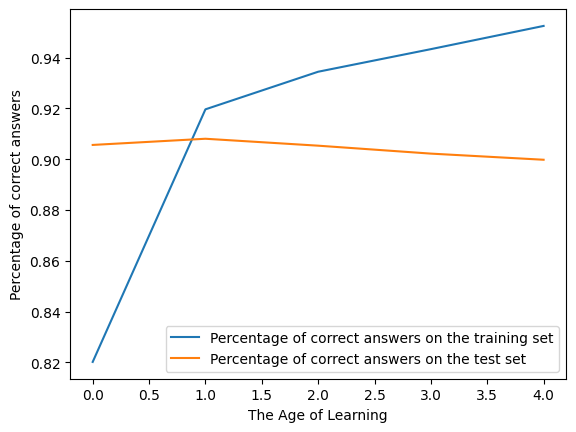

In [25]:
plt.plot(history.history['accuracy'],
         label='Percentage of correct answers on the training set')
plt.plot(history.history['val_accuracy'],
         label='Percentage of correct answers on the test set')
plt.xlabel('The Age of Learning')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()

In [38]:
lstm_model.evaluate(X_test, y_test, verbose=1)

750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.8966 - loss: 0.3401


[0.34045976400375366, 0.8950833082199097]

In [23]:
from tensorflow.keras.layers import  GRU

gru_model = Sequential()
gru_model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
gru_model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
gru_model.add(Dense(4, activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
gru_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
gru_history = gru_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 458s 304ms/step - accuracy: 0.6724 - loss: 7.7956 - val_accuracy: 0.7733 - val_loss: 0.6495
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 468s 281ms/step - accuracy: 0.8422 - loss: 0.9986 - val_accuracy: 0.7754 - val_loss: 0.6361
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 421s 267ms/step - accuracy: 0.8796 - loss: 0.3594 - val_accuracy: 0.7818 - val_loss: 0.6156
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 445s 269ms/step - accuracy: 0.8395 - loss: 17.8578 - val_accuracy: 0.6700 - val_loss: 0.8522
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 450s 275ms/step - accuracy: 0.7481 - loss: 0.6857 - val_accuracy: 0.7107 - val_loss: 0.7667


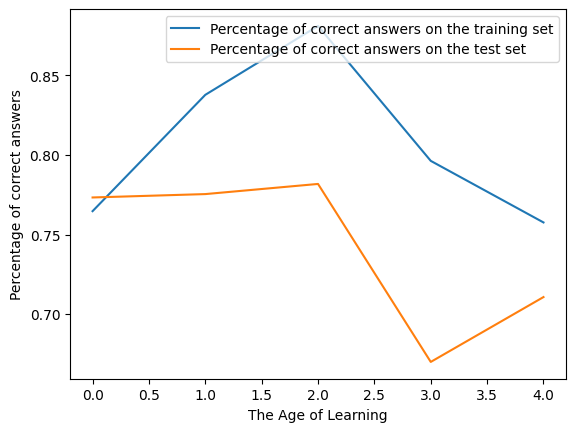

In [27]:
plt.plot(gru_history.history['accuracy'],
         label='Percentage of correct answers on the training set')
plt.plot(gru_history.history['val_accuracy'],
         label='Percentage of correct answers on the test set')
plt.xlabel('The Age of Learning')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()

In [28]:
# Model evaluation LSTM
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {lstm_accuracy * 100:.2f}%")


ValueError: You must call `compile()` before using the model.

In [29]:
#Model evaluation GRU
gru_losss, gru_accuracy = gru_model.evaluate(X_test, y_test)
print(f"GRU Accuracy: {gru_accuracy * 100:.2f}%")

750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.7108 - loss: 0.7665
GRU Accuracy: 71.07%
